In [53]:
#importing library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [54]:
#loading the dataset
df=pd.read_csv('/kaggle/input/student-alcohol-consumption/student-mat.csv')
#showing the dataset
df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0,11,12,10


/tmp/ipykernel_33/3139693961.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


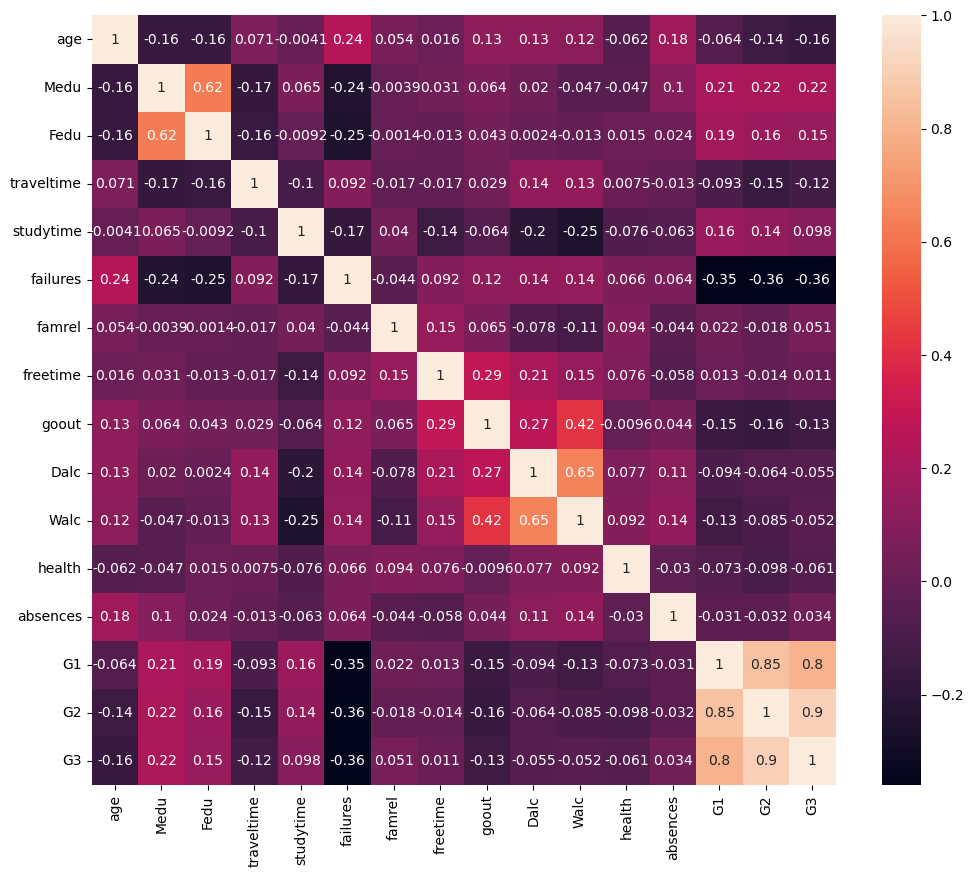

In [55]:
#data visualization
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(),annot=True)
plt.show()

In [56]:
#preprocessing the dataset
#checking for missing values
df.isna().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

In [57]:
#encoding
df.dtypes

school        object
sex           object
age            int64
address       object
famsize       object
Pstatus       object
Medu           int64
Fedu           int64
Mjob          object
Fjob          object
reason        object
guardian      object
traveltime     int64
studytime      int64
failures       int64
schoolsup     object
famsup        object
paid          object
activities    object
nursery       object
higher        object
internet      object
romantic      object
famrel         int64
freetime       int64
goout          int64
Dalc           int64
Walc           int64
health         int64
absences       int64
G1             int64
G2             int64
G3             int64
dtype: object

In [58]:
#selecting only object columns and storing it in a variable
nonumeric_columns=[column for column in df.columns if df[column].dtypes=='object']

In [59]:
nonumeric_columns

['school',
 'sex',
 'address',
 'famsize',
 'Pstatus',
 'Mjob',
 'Fjob',
 'reason',
 'guardian',
 'schoolsup',
 'famsup',
 'paid',
 'activities',
 'nursery',
 'higher',
 'internet',
 'romantic']

In [60]:
#getting unique value in each object columns
{column:list(df[column].unique()) for column in df.columns if df[column].dtypes=='object'}

{'school': ['GP', 'MS'],
 'sex': ['F', 'M'],
 'address': ['U', 'R'],
 'famsize': ['GT3', 'LE3'],
 'Pstatus': ['A', 'T'],
 'Mjob': ['at_home', 'health', 'other', 'services', 'teacher'],
 'Fjob': ['teacher', 'other', 'services', 'health', 'at_home'],
 'reason': ['course', 'other', 'home', 'reputation'],
 'guardian': ['mother', 'father', 'other'],
 'schoolsup': ['yes', 'no'],
 'famsup': ['no', 'yes'],
 'paid': ['no', 'yes'],
 'activities': ['no', 'yes'],
 'nursery': ['yes', 'no'],
 'higher': ['yes', 'no'],
 'internet': ['no', 'yes'],
 'romantic': ['no', 'yes']}

In [61]:
df['school']=df['school'].apply(lambda x:1 if x=='GP' else 0)
df['sex']=df['sex'].apply(lambda x:1 if x=='M' else 0)
df['address']=df['address'].apply(lambda x:1 if x=='U' else 0)
df['famsize']=df['famsize'].apply(lambda x:1 if x=='GT3' else 0)
df['Pstatus']=df['Pstatus'].apply(lambda x:1 if x=='A' else 0)


In [62]:
#replacing binary columns
for column in nonumeric_columns[9:]:
    df[column]=df[column].apply(lambda x:1 if x=='yes' else 0)

In [63]:
def onehot_encode(df,columns):
    df=df.copy()
    for column in columns:
        dummies=pd.get_dummies(df[column],prefix=column)
        df=pd.concat([df,dummies],axis=1)
        df=df.drop(column,axis=1)
    return df

In [64]:
df=onehot_encode(df,nonumeric_columns[5:9])

In [65]:
df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,traveltime,studytime,...,Fjob_other,Fjob_services,Fjob_teacher,reason_course,reason_home,reason_other,reason_reputation,guardian_father,guardian_mother,guardian_other
0,1,0,18,1,1,1,4,4,2,2,...,0,0,1,1,0,0,0,0,1,0
1,1,0,17,1,1,0,1,1,1,2,...,1,0,0,1,0,0,0,1,0,0
2,1,0,15,1,0,0,1,1,1,2,...,1,0,0,0,0,1,0,0,1,0
3,1,0,15,1,1,0,4,2,1,3,...,0,1,0,0,1,0,0,0,1,0
4,1,0,16,1,1,0,3,3,1,2,...,1,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,0,1,20,1,0,1,2,2,1,2,...,0,1,0,1,0,0,0,0,0,1
391,0,1,17,1,0,0,3,1,2,1,...,0,1,0,1,0,0,0,0,1,0
392,0,1,21,0,1,0,1,1,1,1,...,1,0,0,1,0,0,0,0,0,1
393,0,1,18,0,0,0,3,2,3,1,...,1,0,0,1,0,0,0,0,1,0


In [66]:
len(df.columns)

46

In [67]:
df.isna().sum().sum()

0

In [68]:
df['G3']

0       6
1       6
2      10
3      15
4      10
       ..
390     9
391    16
392     7
393    10
394     9
Name: G3, Length: 395, dtype: int64

In [69]:
#splitting the data between target and feature
#target
y=df['G3']
x=df.drop('G3',axis=1)
#splitting the data between train and test
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.7,random_state=213)
scaler=StandardScaler()
scaler.fit(x_train)
x_train=pd.DataFrame(scaler.transform(x_train),columns=x_train.columns)
x_test=pd.DataFrame(scaler.transform(x_test),columns=x_test.columns)

In [70]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(276, 45)
(119, 45)
(276,)
(119,)


In [73]:
#training the model
model=LinearRegression()
model.fit(x_train,y_train)
print('Model Score',model.score(x_test,y_test))

Model Score 0.8134318540603804


In [74]:
model.predict(x_test)

array([10.86803666, 14.59459916,  4.80553666,  5.00084916,  7.16491166,
       13.38366166,  7.96178666,  8.28991166,  8.28991166, 12.91491166,
        8.71178666, 10.60241166,  8.57897416, 10.87584916, 15.96178666,
       11.33678666, 14.79772416,  8.93053666, 11.16491166,  3.78991166,
        7.93053666,  6.77819291, 12.37584916,  7.32116166,  9.61803666,
        5.41491166, 20.12584916, 12.35241166,  0.11803666,  3.71178666,
       13.71959916, 12.03991166, 16.22741166, 15.61022416,  6.88366166,
        9.93053666,  7.76647416, 14.00084916,  4.60241166,  3.08678666,
        9.78991166,  7.79772416,  9.21178666,  9.46178666,  8.33678666,
       15.46178666, 10.29772416,  5.99303666, 10.50866166, 12.56334916,
       16.69616166, 14.98522416, -0.74915084,  8.52428666, 13.63366166,
       16.29381791, 13.44616166, 11.96178666,  5.76256791,  8.00866166,
       11.07116166, 15.65709916,  8.29381791, 14.49303666, 10.85241166,
       10.99303666, 13.50866166,  8.23522416, 11.32897416, -1.17

In [76]:
y_test

105    11
12     14
220     6
373     5
337     0
       ..
34     15
330     8
83     15
212    14
190    13
Name: G3, Length: 119, dtype: int64